In [264]:
import pandas as pd
from datetime import timedelta
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [202]:
file_path = "Resources/sleepdata.csv"
sleepData = pd.read_csv(file_path)
sleepData

,Start,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Stressful day Total,Drank coffee Total,Drank tea Total,Ate late Total,Worked out Total
0,12/29/2014 22:57,12/30/2014 7:30,100%,8:32,:),59.0,0,0,0,0,0,0
1,12/30/2014 21:17,12/30/2014 21:33,3%,0:16,:|,72.0,0,1,0,0,0,0
2,12/30/2014 22:42,12/31/2014 7:13,98%,8:30,:|,57.0,0,0,0,0,0,0
3,12/31/2014 22:31,1/1/2015 6:03,65%,7:32,NaN,NaN,0,0,0,0,0,0
4,1/1/2015 22:12,1/2/2015 4:56,72%,6:44,:),68.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,2/12/2018 21:54,2/13/2018 7:02,91%,9:08,NaN,NaN,56,0,0,0,0,0
883,2/13/2018 23:49,2/14/2018 7:00,81%,7:11,NaN,NaN,64,0,0,0,0,0
884,2/14/2018 21:24,2/15/2018 6:20,71%,8:56,NaN,NaN,3316,0,0,0,0,0
885,2/15/2018 21:36,2/16/2018 6:50,80%,9:13,NaN,NaN,6555,0,0,0,0,0


In [203]:
#Split Time in bed and convert to minutes
time_strs = sleepData["Time in bed"].str.split(":")
time_strs

0      [8, 32]
1      [0, 16]
2      [8, 30]
3      [7, 32]
4      [6, 44]
        ...   
882    [9, 08]
883    [7, 11]
884    [8, 56]
885    [9, 13]
886    [8, 55]
Name: Time in bed, Length: 887, dtype: object

In [204]:
sleepData["Time in bed"] = time_strs.apply(lambda x: int(x[1]) + (int(x[0]) * 60))

In [205]:
#Replace % with '' in order to parse column to int
sleepData["Sleep quality"] = sleepData["Sleep quality"].str.replace('%', '')

In [206]:
sleepData["Sleep quality"] = pd.to_numeric(sleepData["Sleep quality"])

In [207]:
#Convert Start and End times to datetime
sleepData['Start'] = pd.to_datetime(sleepData["Start"])
sleepData['End'] = pd.to_datetime(sleepData["End"])

In [208]:
sleepData.dtypes

Start                  datetime64[ns]
End                    datetime64[ns]
Sleep quality                   int64
Time in bed                     int64
Wake up                        object
Heart rate                    float64
Activity (steps)                int64
Stressful day Total             int64
Drank coffee Total              int64
Drank tea Total                 int64
Ate late Total                  int64
Worked out Total                int64
dtype: object

In [209]:
sleepData['Start'] = (sleepData['Start'].dt.hour * 100) + sleepData['Start'].dt.minute

In [210]:
sleepData['End'] = (sleepData['End'].dt.hour * 100) + sleepData['End'].dt.minute

In [211]:
sleepData

,Start,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Stressful day Total,Drank coffee Total,Drank tea Total,Ate late Total,Worked out Total
0,2257,730,100,512,:),59.0,0,0,0,0,0,0
1,2117,2133,3,16,:|,72.0,0,1,0,0,0,0
2,2242,713,98,510,:|,57.0,0,0,0,0,0,0
3,2231,603,65,452,NaN,NaN,0,0,0,0,0,0
4,2212,456,72,404,:),68.0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
882,2154,702,91,548,NaN,NaN,56,0,0,0,0,0
883,2349,700,81,431,NaN,NaN,64,0,0,0,0,0
884,2124,620,71,536,NaN,NaN,3316,0,0,0,0,0
885,2136,650,80,553,NaN,NaN,6555,0,0,0,0,0


In [212]:
sleepData.isnull().sum()

Start                    0
End                      0
Sleep quality            0
Time in bed              0
Wake up                641
Heart rate             725
Activity (steps)         0
Stressful day Total      0
Drank coffee Total       0
Drank tea Total          0
Ate late Total           0
Worked out Total         0
dtype: int64

In [215]:
sleepData.count()

Start                  887
End                    887
Sleep quality          887
Time in bed            887
Wake up                246
Heart rate             162
Activity (steps)       887
Stressful day Total    887
Drank coffee Total     887
Drank tea Total        887
Ate late Total         887
Worked out Total       887
dtype: int64

In [216]:
sleepData.head()

,Start,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Stressful day Total,Drank coffee Total,Drank tea Total,Ate late Total,Worked out Total
0,2257,730,100,512,:),59.0,0,0,0,0,0,0
1,2117,2133,3,16,:|,72.0,0,1,0,0,0,0
2,2242,713,98,510,:|,57.0,0,0,0,0,0,0
3,2231,603,65,452,NaN,NaN,0,0,0,0,0,0
4,2212,456,72,404,:),68.0,0,0,1,1,0,0


In [223]:
sleepDataLog = pd.DataFrame(sleepData, columns = ["Start", "End", "Sleep quality"], index = sleepData.index)
sleepDataLog

,Start,End,Sleep quality
0,2257,730,100
1,2117,2133,3
2,2242,713,98
3,2231,603,65
4,2212,456,72
...,...,...,...
882,2154,702,91
883,2349,700,81
884,2124,620,71
885,2136,650,80


In [224]:
sleepDataLinear = pd.DataFrame(sleepData, columns = ["Time in bed", "Sleep quality"], index = sleepData.index)
sleepDataLinear

,Time in bed,Sleep quality
0,512,100
1,16,3
2,510,98
3,452,65
4,404,72
...,...,...
882,548,91
883,431,81
884,536,71
885,553,80


# Linear Regression

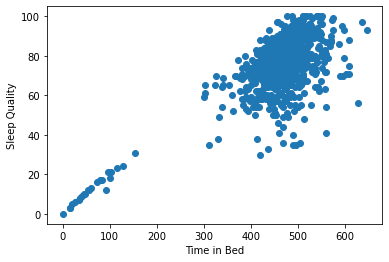

In [229]:
plt.scatter(sleepDataLinear["Time in bed"], sleepDataLinear["Sleep quality"])
plt.xlabel('Time in Bed')
plt.ylabel('Sleep Quality')
plt.show()

In [250]:
X_linear = sleepDataLinear["Time in bed"].values.reshape(-1, 1)
y_linear = sleepDataLinear["Sleep quality"]

In [251]:
# Create a model with scikit-learn
model = LinearRegression()
# Fit the data into the model
model.fit(X_linear, y_linear)

LinearRegression()

In [253]:
# The model creates predicted y values based on X values
y_pred = model.predict(X_linear)
print(y_pred.shape)

(887,)


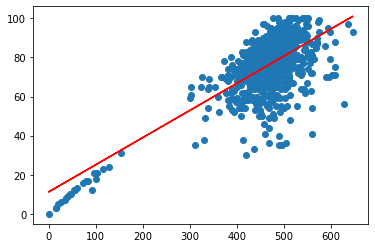

In [255]:
# Plot the results. The best fit line is red.
plt.scatter(X_linear, y_linear)
plt.plot(X_linear, y_pred, color='red')
plt.show()

## Splitting the data using Start/End time

In [282]:
y = sleepDataLog["Sleep quality"]
X = sleepDataLog.drop(columns ="Sleep quality")

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

## Logistic Regression

In [260]:
classifier = LogisticRegression(solver='lbfgs')
classifier

LogisticRegression()

In [261]:
# Train the data
classifier.fit(X_train, y_train)

C:\Users\cantt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [262]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
522,81,92
314,81,81
768,81,79
320,81,77
809,81,85
...,...,...
35,81,89
46,81,87
255,81,83
670,81,69


In [263]:
accuracy_score(y_test, predictions)

0.018018018018018018

## SVM

In [265]:
# Instantiate a linear SVM model
model = SVC(kernel='linear')

In [266]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

In [267]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,91,92
1,81,81
2,81,79
3,81,77
4,81,85


In [268]:
accuracy_score(y_test, y_pred)

0.02702702702702703

In [284]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [285]:
# Fitting the model
model = model.fit(X_train, y_train)

In [286]:
# Making predictions using the testing data
predictions = model.predict(X_test)

In [289]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 0.04954954954954955
Classification Report
              precision    recall  f1-score   support

           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.0

C:\Users\cantt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cantt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cantt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cantt\anaconda3\lib\site-packages\sklearn\metrics\_cla

## Scaling and Splitting the data

In [269]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [270]:
# Fitting Standard Scaller
dataScaled = scaler.fit_transform(sleepDataLog)
dataScaled[:5]

array([[ 0.39608986,  0.98947373,  1.62758605],
       [ 0.17913904, 14.67217995, -4.66107375],
       [ 0.37284513,  0.82368185,  1.49792297],
       [ 0.355799  , -0.24908913, -0.641518  ],
       [ 0.32635567, -1.68270126, -0.18769719]])

In [271]:
dataScaled_df = pd.DataFrame(dataScaled, columns = sleepDataLog.columns)
dataScaled_df

,Start,End,Sleep quality
0,0.396090,0.989474,1.627586
1,0.179139,14.672180,-4.661074
2,0.372845,0.823682,1.497923
3,0.355799,-0.249089,-0.641518
4,0.326356,-1.682701,-0.187697
...,...,...,...
882,0.236476,0.716405,1.044102
883,0.538658,0.696900,0.395787
884,0.189987,-0.083297,-0.252529
885,0.208582,0.209277,0.330955


In [278]:
y_scaled = dataScaled_df["Sleep quality"]
X_scaled = dataScaled_df.drop(columns = "Sleep quality")

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y_scaled, 
                                                    random_state=1)
X_train.shape

(665, 2)

## Neural Network

In [192]:
# Create the Keras Sequential model
import tensorflow as tf
nn_model = tf.keras.models.Sequential()

In [193]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [194]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [195]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [196]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [197]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 598us/step - loss: 0.6983 - accuracy: 0.0000e+00
Epoch 2/100
21/21 [==============================] - 0s 598us/step - loss: 0.6869 - accuracy: 0.0000e+00
Epoch 3/100
21/21 [==============================] - 0s 548us/step - loss: 0.6757 - accuracy: 0.0000e+00
Epoch 4/100
21/21 [==============================] - 0s 698us/step - loss: 0.6653 - accuracy: 0.0000e+00
Epoch 5/100
21/21 [==============================] - 0s 648us/step - loss: 0.6549 - accuracy: 0.0000e+00
Epoch 6/100
21/21 [==============================] - 0s 648us/step - loss: 0.6448 - accuracy: 0.0000e+00
Epoch 7/100
21/21 [==============================] - 0s 698us/step - loss: 0.6348 - accuracy: 0.0000e+00
Epoch 8/100
21/21 [==============================] - 0s 649us/step - loss: 0.6255 - accuracy: 0.0000e+00
Epoch 9/100
21/21 [==============================] - 0s 648us/step - loss: 0.6156 - accuracy: 0.0000e+00
Epoch 10/100
21/21 [==============================] - 0

<AxesSubplot:>

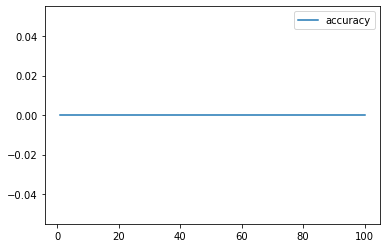

In [200]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="accuracy")